In [4]:
#import tensorflow as tf
#from sklearn.datasets import load_boston
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
boston_df = fetch_openml(name="boston", version=1)

In [6]:
df = pd.DataFrame(data=boston_df.data, columns=boston_df.feature_names)
df["Price"] = boston_df.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [7]:
df.iloc[0].to_dict()

{'CRIM': 0.00632,
 'ZN': 18.0,
 'INDUS': 2.31,
 'CHAS': '0',
 'NOX': 0.538,
 'RM': 6.575,
 'AGE': 65.2,
 'DIS': 4.09,
 'RAD': '1',
 'TAX': 296.0,
 'PTRATIO': 15.3,
 'B': 396.9,
 'LSTAT': 4.98,
 'Price': 24.0}

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  Price    506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


In [34]:
df.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


In [35]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

### Exploratory Data Analysis

In [36]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


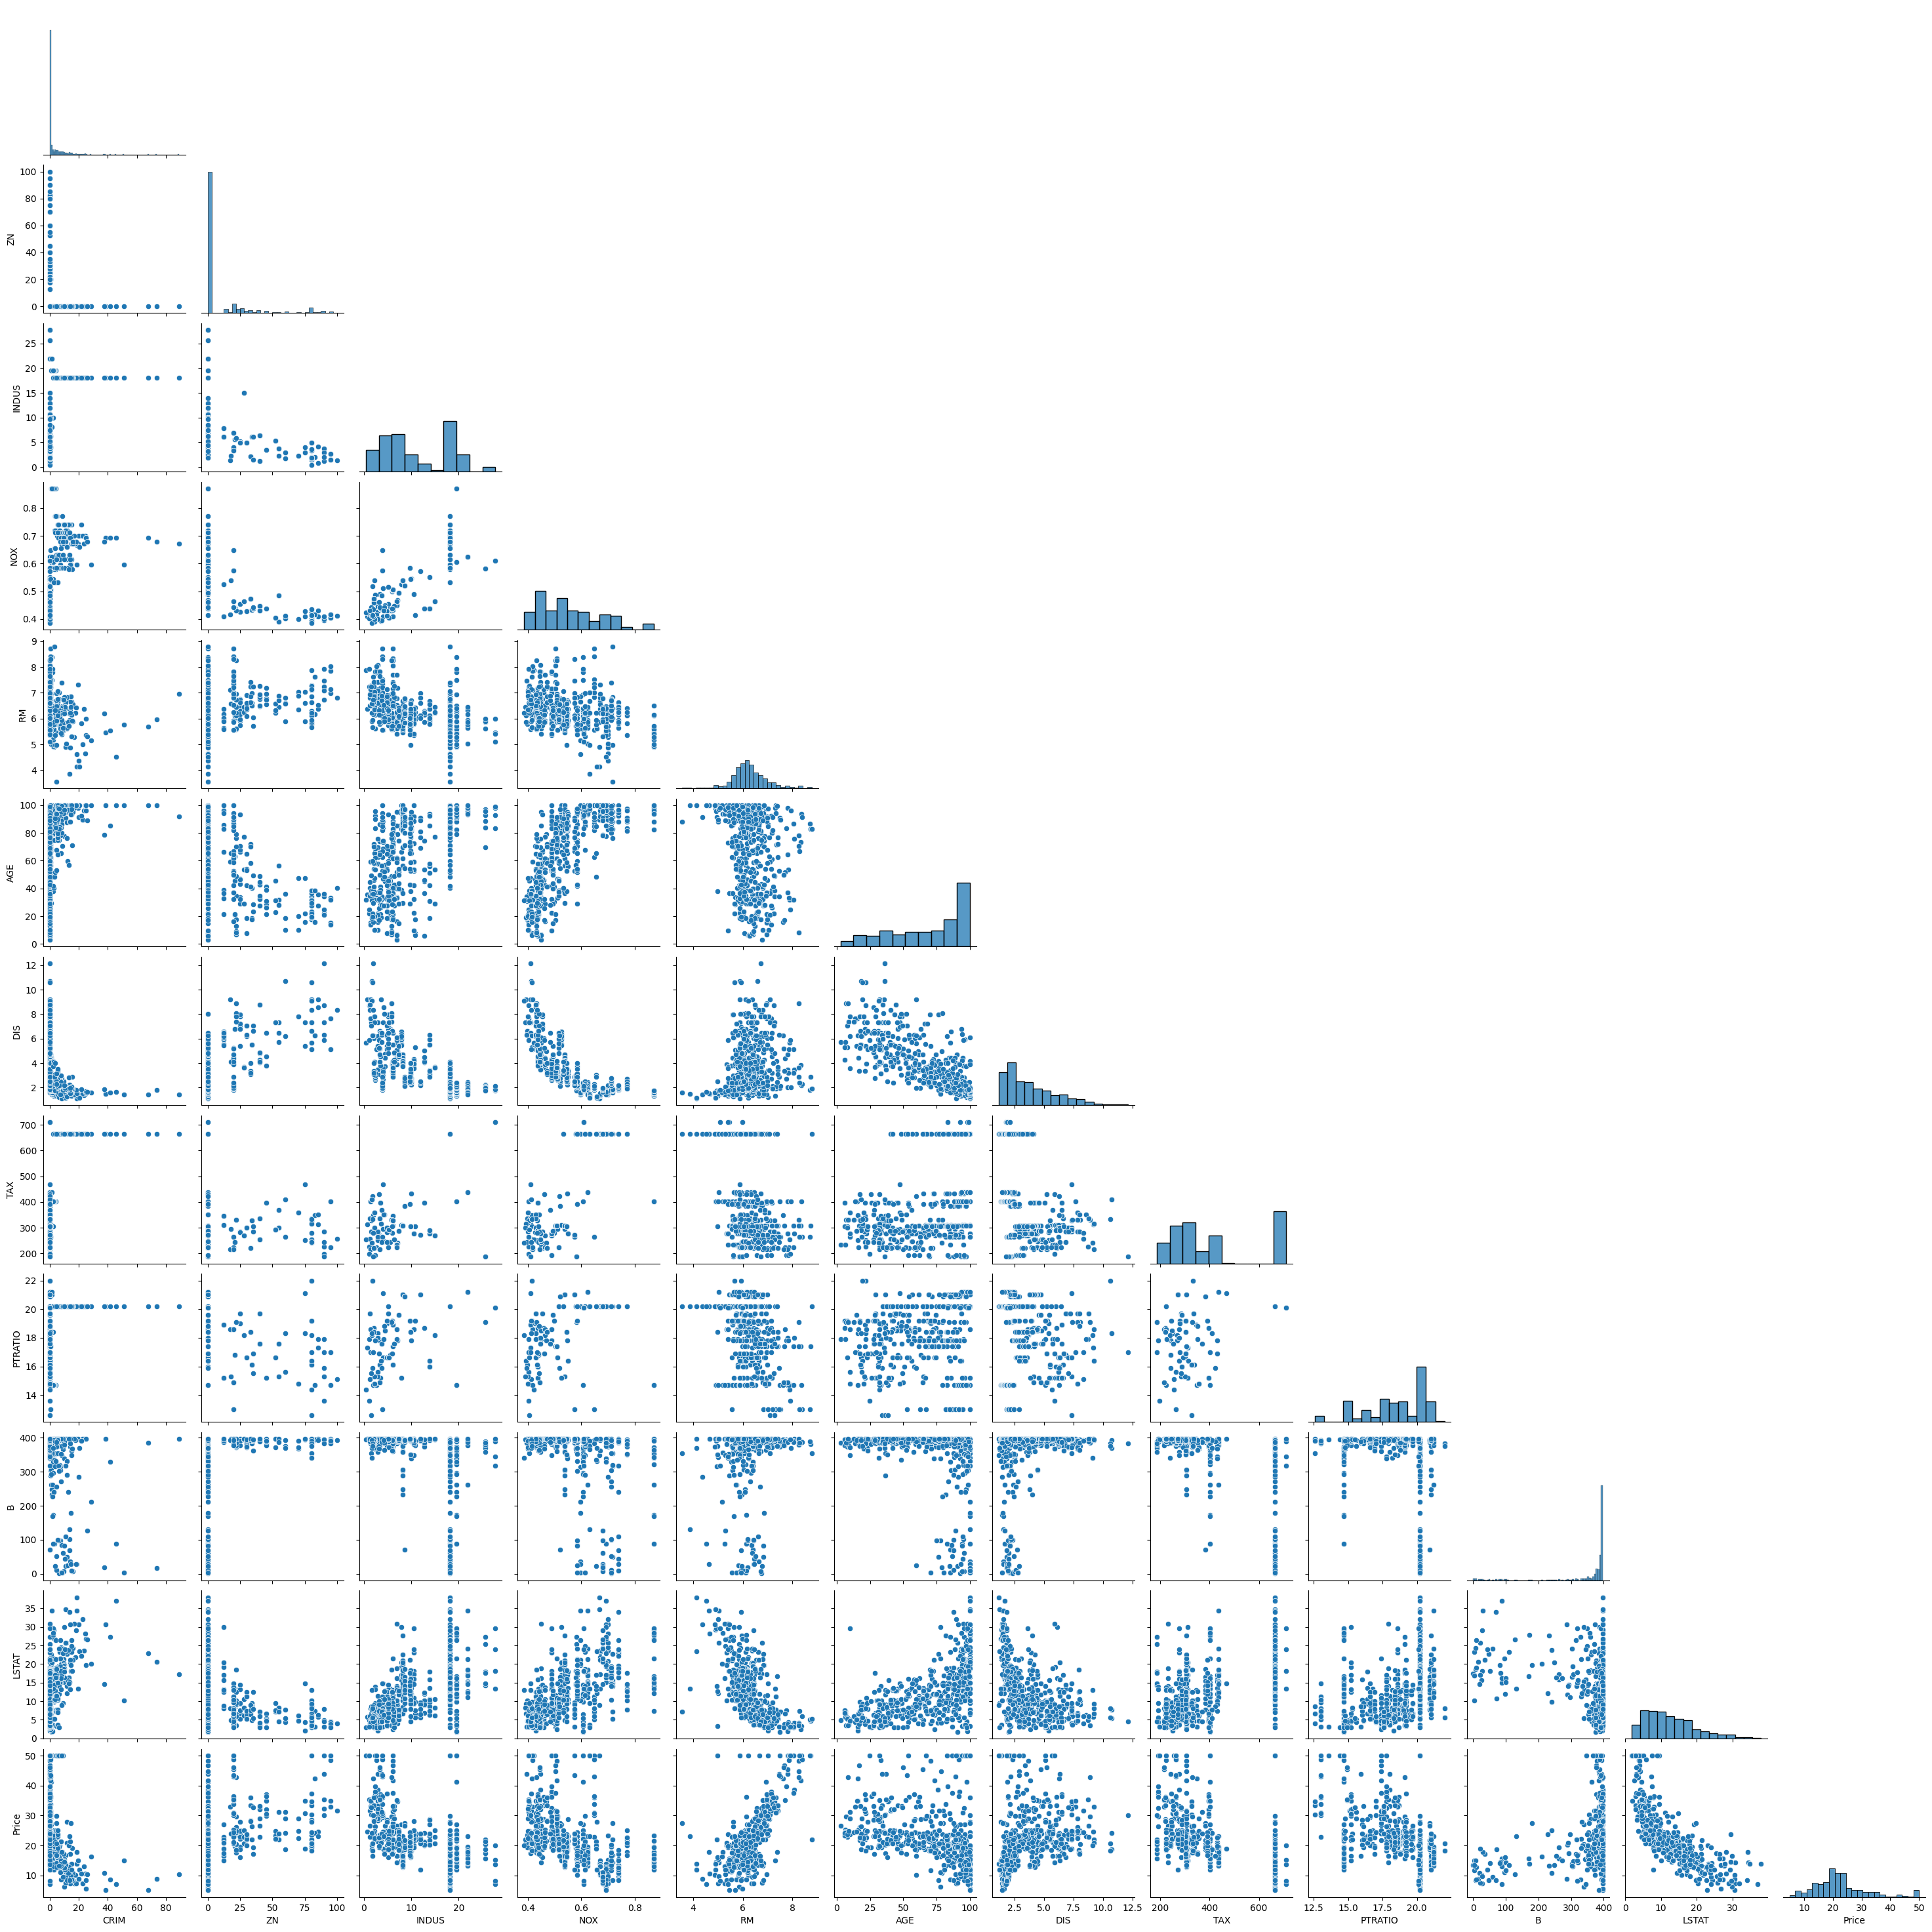

In [37]:
sns.pairplot(df, corner=True)

<Axes: xlabel='CRIM', ylabel='Price'>

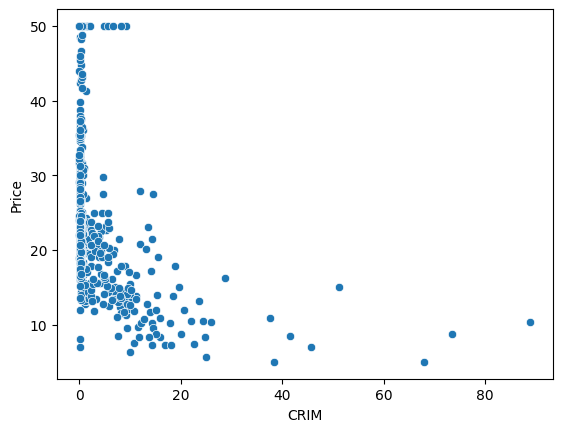

In [38]:
sns.scatterplot(data=df, x="CRIM", y="Price")

Text(0, 0.5, 'Price')

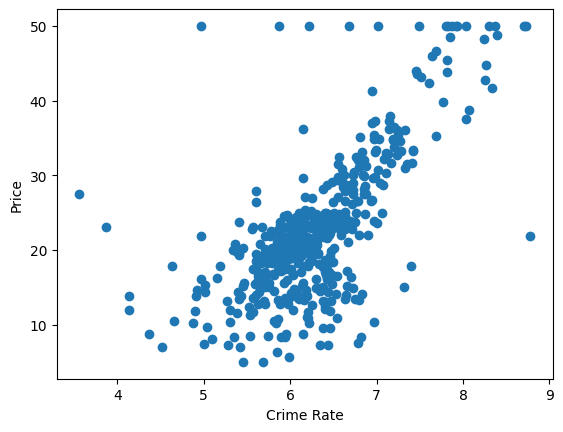

In [39]:
plt.scatter(df.RM, df.Price)
plt.xlabel("Crime Rate")
plt.ylabel("Price")

<Axes: xlabel='RM', ylabel='Price'>

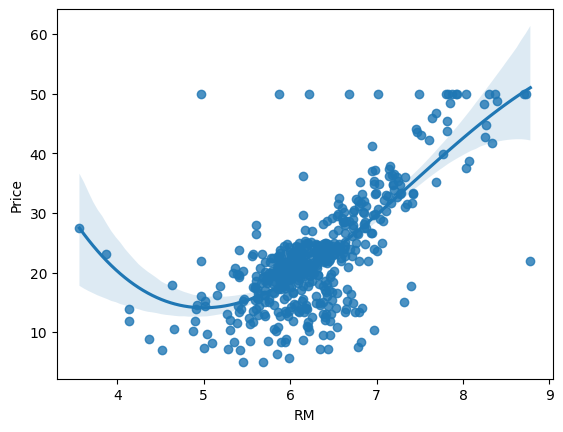

In [40]:
sns.regplot(data=df, x="RM", y="Price", order=3)

<Axes: xlabel='LSTAT', ylabel='Price'>

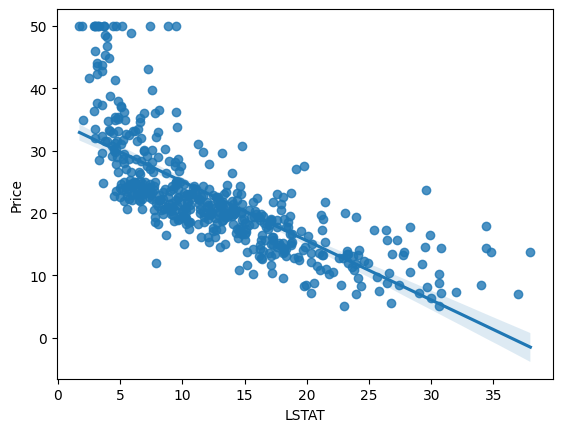

In [41]:
sns.regplot(data=df, x="LSTAT", y="Price")

<Axes: xlabel='PTRATIO', ylabel='Price'>

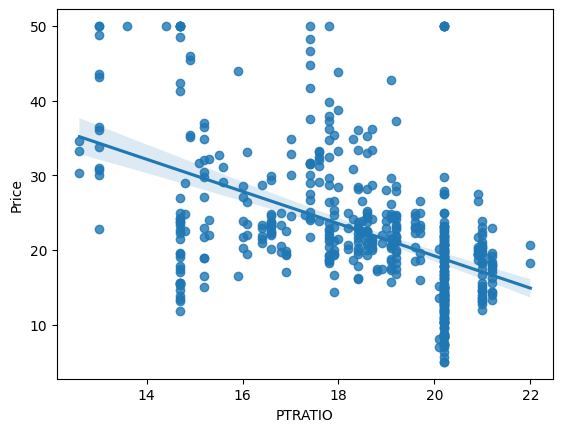

In [42]:
sns.regplot(data=df, x="PTRATIO", y="Price", order=1)

## Independent and Dependent Features

In [43]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Model Training

In [45]:
regression = LinearRegression(n_jobs=1000)

In [46]:
regression.fit(X_train, y_train)

LinearRegression(n_jobs=1000)

In [47]:
print(regression.coef_, regression.intercept_, sep="\nIntercept is: ")

[-1.10834602  0.80843998  0.34313466  0.81386426 -1.79804295  2.913858
 -0.29893918 -2.94251148  2.09419303 -1.44706731 -2.05232232  1.02375187
 -3.88579002]
Intercept is: 23.01581920903955


In [48]:
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1000, 'positive': False}

In [49]:
reg_pred = regression.predict(X_test)

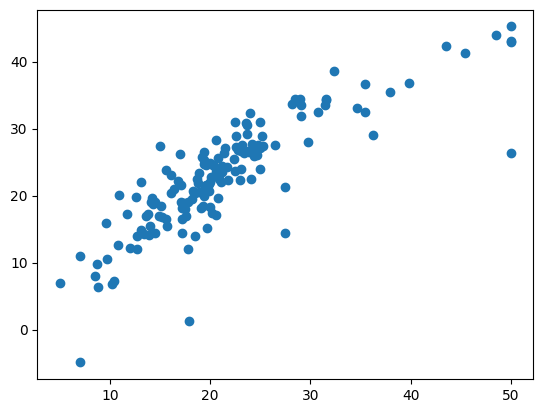

In [50]:
plt.scatter(y_test, reg_pred)

In [51]:
score = regression.score(X_test, y_test)*100
print("Score of model: ", round(score, 2), "%")
#Using R2 Score:
score = r2_score(y_true=y_test, y_pred=reg_pred)
score

Score of model:  67.61 %


0.6761000049033605

## New Data Prediction

In [52]:
boston_df.target

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [53]:
test_data = np.array(boston_df.data.iloc[0]).reshape(1, -1)

In [54]:
test_data = scaler.transform(test_data)

/home/heliosquant/Documents/Projects/DeployML/depenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [55]:
regression.predict(test_data)

array([32.36964545])

## Save Model

In [56]:
with open("regression.pkl", "wb") as file:
    pickle.dump(regression, file)

## Save Scalar

In [57]:
with open("scaling.pkl", "wb") as file:
    pickle.dump(scaler, file)

## Load Model

In [58]:
with open("regression.pkl", "rb") as file:
    pickled_model = pickle.load(file)

In [59]:
pickled_model.predict(test_data)

array([32.36964545])